In [1]:
using PyPlot

# Tarea 3

## Eigenvalores de una matriz hermitiana aleatoria

In [2]:
# Se crea una matriz hermitiana que es aleatoria y se regresan sus eigenvalores
function randHermitian(n)
    a = rand(n,n)+1im*rand(n,n)
    b = a+conj(transpose(a))
    return eigvals(b)
end

randHermitian (generic function with 1 method)

* Generar una matriz hermitiana de $n\times n$, calcular sus eigenvalores, y calcular la distribución de la diferencia entre eigenvalores consecutivos

In [3]:
# Se generan varias matrices de dimension n y se calculan las diferencias entre eigenvalores consecutivos
function dif_cons(n, m)
    diferencias = []
    for i in 1:m
        eigenH = randHermitian(n)
        for j in 1:n-1
            push!(diferencias, eigenH[j+1]-eigenH[j])
        end
    end
    return diferencias
end

dif_cons (generic function with 1 method)

### Para matrices de 7x7

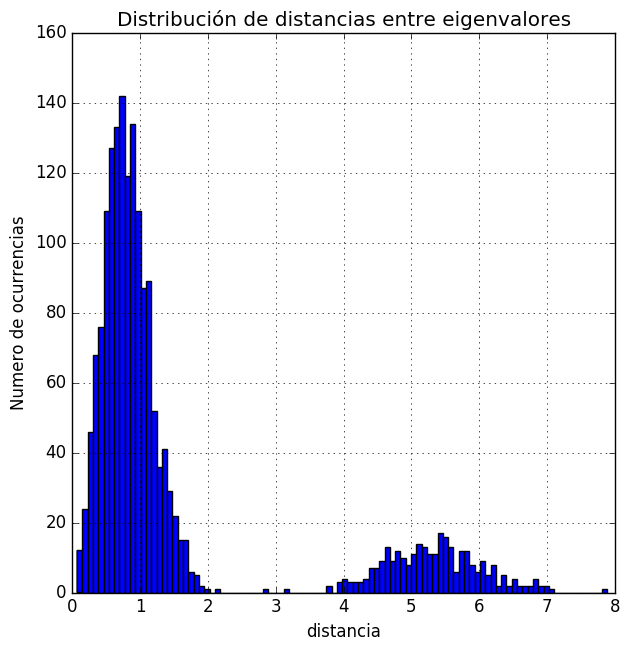

PyObject <matplotlib.text.Text object at 0x3265d6d10>

In [24]:
fig = figure("pyplot_subplot_mixed",figsize=(7,7))
a = dif_cons(7, 300)
h = plt[:hist](a, 100)
grid("on")
xlabel("distancia")
ylabel("Numero de ocurrencias")
title("Distribución de distancias entre eigenvalores")

### Para matrices de 20x20

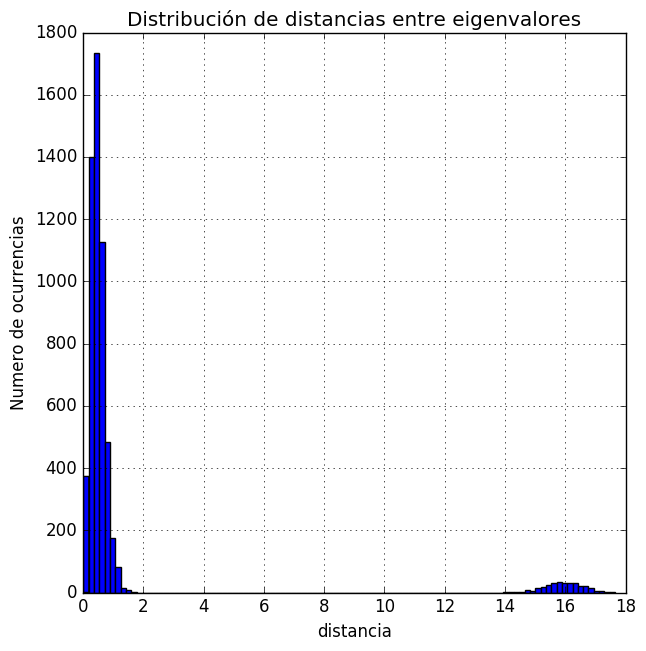

PyObject <matplotlib.text.Text object at 0x326a69990>

In [25]:
fig = figure("pyplot_subplot_mixed",figsize=(7,7))
a = dif_cons(20, 300)
h = plt[:hist](a, 100)
grid("on")
xlabel("distancia")
ylabel("Numero de ocurrencias")
title("Distribución de distancias entre eigenvalores")

## Envolvente convexa

Dados un conjunto de puntos en el plano se trata de encontrar la envolvente convexa del conjunto.

In [117]:
function proyeccion(v, u)
    v_uni = v/norm(v)
    u_uni = u/norm(u)
    return dot(vec(u_uni),vec(v_uni))
end

function busca_siguiente(puntos, idx_actual, idx_pasado=-5)
    N = length(puntos[:,1])
    
    if idx_pasado != 5
        arista = puntos[idx_actual]-puntos[idx_pasado]
    else
        arista = puntos[idx_actual]-[puntos[idx_actual,2] -puntos[idx_actual,1]]
    end
    arista = arista/norm(arista)
    
    proyecciones = zeros(N)
    for i in 1:N
        puntos_normalizados = puntos[i,:] - puntos[idx_actual,:]
        proyecciones[i] = proyeccion(puntos[idx_actual,:], puntos_normalizados/norm(puntos_normalizados))
    end
    
    idx_max = findmax(proyecciones)
    return idx_max
end

function poligono_convexo(puntos)
    N = length(puntos)
    normas = zeros(N)
    for i in 1:N
        normas[i] = norm(puntos[i,:])
    end
    idx_sig = findmax(normas)
    repertorio_idx = []
    ## encontrar el segundo
    
    
    while length(find(x -> x==idx_sig, repertorio_idx))==0
        push!(repertorio_idx, idx_sig)
        idx_sig = busca_siguiente(puntos, repertorio_idx[end], repertorio_idx[end-1])
    end
    
    return repertorio_idx
end

proyeccion (generic function with 1 method)